<a href="https://colab.research.google.com/github/halattas1/halattas1/blob/main/PGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

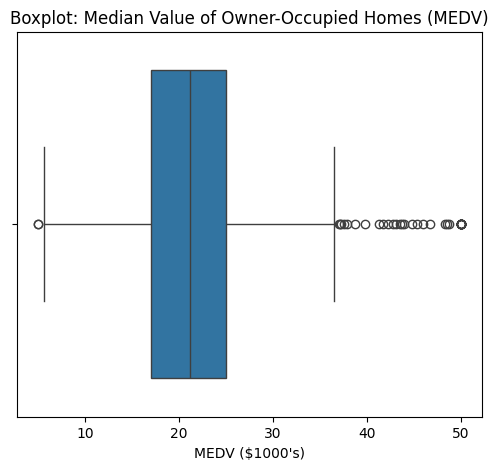

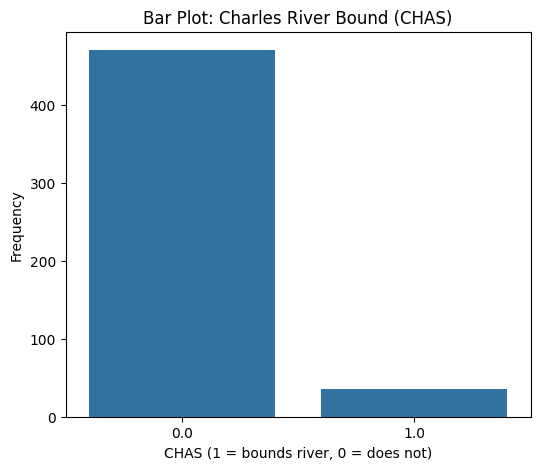

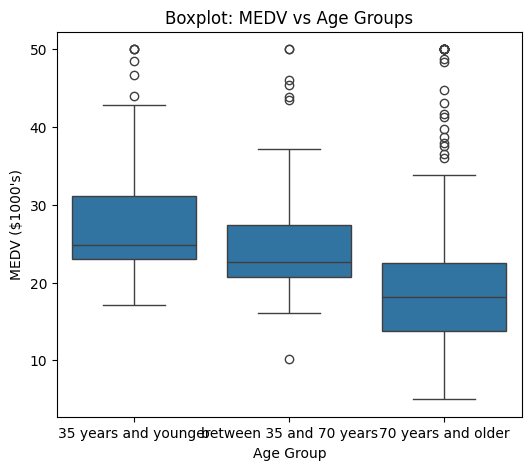

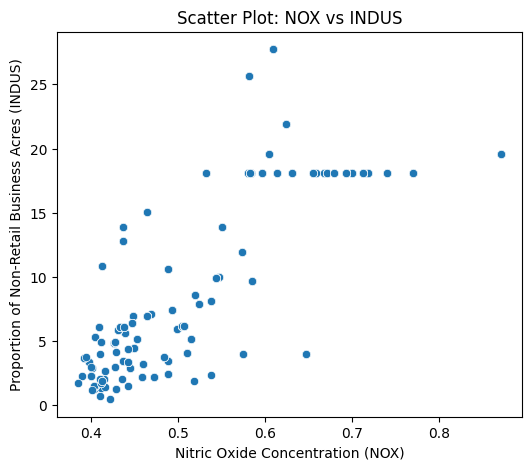

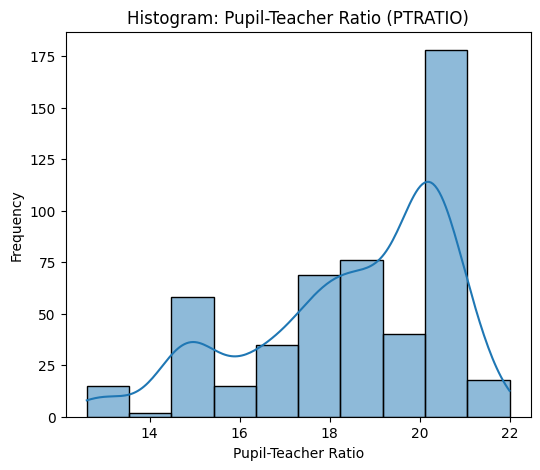


T-Test: MEDV by CHAS
H0: No difference in MEDV for houses near Charles River (CHAS=1) and others (CHAS=0)
HA: There is a difference

T-statistic = 3.9964, P-value = 0.0001
Conclusion: Reject H0. Significant difference exists.

ANOVA: MEDV by Age Group
H0: No difference in MEDV across AGE groups
HA: At least one AGE group differs in MEDV

F-statistic = 36.4076, P-value = 0.0000
Conclusion: Reject H0. Significant differences between age groups.

Pearson Correlation: NOX vs INDUS
H0: No linear relationship between NOX and INDUS
HA: There is a linear relationship

Correlation coefficient = 0.7637, P-value = 0.0000
Conclusion: Reject H0. There is a significant relationship.

Regression Analysis: DIS vs MEDV
H0: No impact of DIS on MEDV
HA: DIS has an impact on MEDV

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:              

In [1]:
# Install necessary libraries
!pip install pandas seaborn matplotlib scipy statsmodels

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Task 1: Load the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(url)

# Task 2: Descriptive Statistics and Visualizations

# Boxplot for MEDV
pyplot.figure(figsize=(6,5))
sns.boxplot(x=boston_df["MEDV"])
pyplot.title("Boxplot: Median Value of Owner-Occupied Homes (MEDV)")
pyplot.xlabel("MEDV ($1000's)")
pyplot.show()

# Bar plot for CHAS (Charles River)
pyplot.figure(figsize=(6,5))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title("Bar Plot: Charles River Bound (CHAS)")
pyplot.xlabel("CHAS (1 = bounds river, 0 = does not)")
pyplot.ylabel("Frequency")
pyplot.show()

# Boxplot for MEDV vs AGE group
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100],
                                labels=["35 years and younger", "between 35 and 70 years", "70 years and older"])
pyplot.figure(figsize=(6,5))
sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df)
pyplot.title("Boxplot: MEDV vs Age Groups")
pyplot.xlabel("Age Group")
pyplot.ylabel("MEDV ($1000's)")
pyplot.show()

# Scatter plot NOX vs INDUS
pyplot.figure(figsize=(6,5))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title("Scatter Plot: NOX vs INDUS")
pyplot.xlabel("Nitric Oxide Concentration (NOX)")
pyplot.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
pyplot.show()

# Histogram for PTRATIO
pyplot.figure(figsize=(6,5))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
pyplot.title("Histogram: Pupil-Teacher Ratio (PTRATIO)")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

# Task 3: Hypothesis Testing

# --- T-Test: MEDV by CHAS ---
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_val = scipy.stats.ttest_ind(group1, group0)
print("\nT-Test: MEDV by CHAS")
print("H0: No difference in MEDV for houses near Charles River (CHAS=1) and others (CHAS=0)")
print("HA: There is a difference\n")
print(f"T-statistic = {t_stat:.4f}, P-value = {p_val:.4f}")
if p_val < 0.05:
    print("Conclusion: Reject H0. Significant difference exists.")
else:
    print("Conclusion: Fail to reject H0. No significant difference.")

# --- ANOVA: MEDV by AGE group ---
grouped_data = [boston_df[boston_df['AGE_GROUP'] == g]['MEDV'] for g in boston_df['AGE_GROUP'].unique()]
f_stat, p_val_anova = scipy.stats.f_oneway(*grouped_data)
print("\nANOVA: MEDV by Age Group")
print("H0: No difference in MEDV across AGE groups")
print("HA: At least one AGE group differs in MEDV\n")
print(f"F-statistic = {f_stat:.4f}, P-value = {p_val_anova:.4f}")
if p_val_anova < 0.05:
    print("Conclusion: Reject H0. Significant differences between age groups.")
else:
    print("Conclusion: Fail to reject H0. No significant difference between groups.")

# --- Pearson Correlation: NOX and INDUS ---
corr_stat, corr_p = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation: NOX vs INDUS")
print("H0: No linear relationship between NOX and INDUS")
print("HA: There is a linear relationship\n")
print(f"Correlation coefficient = {corr_stat:.4f}, P-value = {corr_p:.4f}")
if corr_p < 0.05:
    print("Conclusion: Reject H0. There is a significant relationship.")
else:
    print("Conclusion: Fail to reject H0. No significant relationship.")

# --- Regression Analysis: DIS vs MEDV ---
X = sm.add_constant(boston_df['DIS'])
model = sm.OLS(boston_df['MEDV'], X).fit()
print("\nRegression Analysis: DIS vs MEDV")
print("H0: No impact of DIS on MEDV")
print("HA: DIS has an impact on MEDV\n")
print(model.summary())
if model.pvalues['DIS'] < 0.05:
    print("Conclusion: Reject H0. DIS has a significant impact on MEDV.")
else:
    print("Conclusion: Fail to reject H0. DIS does not significantly impact MEDV.")
